# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier


# Define Functions

In [2]:
def scale_min_max(X):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(X)
    return pd.DataFrame(x_scaled)

# Load Data

## Circuits

In [3]:
circuit_df = pd.read_csv('circuits.csv', na_values=['\\N'])
circuit_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,NaN,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,NaN,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,NaN,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,NaN,http://en.wikipedia.org/wiki/Istanbul_Park


## Constructors

In [4]:
constructor_df = pd.read_csv('constructors.csv', na_values=['\\N'])
constructor_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


## Constructor Results

In [5]:
constructor_result_df = pd.read_csv('constructor_results.csv', na_values=['\\N'])
constructor_result_df.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,NaN
1,2,18,2,8.0,NaN
2,3,18,3,9.0,NaN
3,4,18,4,5.0,NaN
4,5,18,5,2.0,NaN


## Constructor Standings

In [6]:
constructor_standing_df = pd.read_csv('constructor_standings.csv', na_values=['\\N'])
constructor_standing_df.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


## Drivers

In [7]:
driver_df = pd.read_csv('drivers.csv', na_values=['\\N'])
driver_df['full_name'] = driver_df.apply(
    lambda x: f"{x['forename']} {x['surname']}",
    axis=1,
)
driver_df['dob_dt'] = pd.to_datetime(
    driver_df['dob'],
    format='%Y-%m-%d',
    errors='coerce',
)
driver_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,full_name,dob_dt
0,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton,1985-01-07
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld,1977-05-10
2,3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg,1985-06-27
3,4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso,1981-07-29
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen,1981-10-19


## Driver Standings

In [8]:
driver_standing_df = pd.read_csv('driver_standings.csv', na_values=['\\N'])
driver_standing_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


## Lap Times

In [9]:
lap_time_df = pd.read_csv('lap_times.csv', na_values=['\\N'])
lap_time_df.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


## Pit Stops

In [10]:
pit_stop_df = pd.read_csv('pit_stops.csv', na_values=['\\N'])
pit_stop_df.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


## Qualifying

In [11]:
qualifying_df = pd.read_csv('qualifying.csv', na_values=['\\N'])
qualifying_df.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


## Races

In [12]:
race_df = pd.read_csv('races.csv', na_values=['\\N'])
race_df['time'] = race_df['time'].fillna('00:00:00')
race_df['datetime'] = pd.to_datetime(
    race_df.apply(
        lambda x: f"{x['date']}T{x['time']}",
        axis=1,
    ),
    format='%Y-%m-%dT%H:%M:%S',
    errors='coerce',
)
race_df.head()

,raceId,year,round,circuitId,name,date,time,url,datetime
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,2009-03-29 06:00:00
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,2009-04-05 09:00:00
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,2009-04-19 07:00:00
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,2009-04-26 12:00:00
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,2009-05-10 12:00:00


## Results

In [13]:
result_df = pd.read_csv('results.csv', na_values=['\\N'])
result_df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1


## Seasons

In [14]:
season_df = pd.read_csv('seasons.csv', na_values=['\\N'])
season_df.head()

,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...


## Status

In [15]:
status_df = pd.read_csv('status.csv', na_values=['\\N'])
status_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


## Weather 

Weather plays a significant role on the choice of tyres, on the drivers’ performance and on the overall teams’ strategy. Here I use supplementary dataset from data enthusiast whom accquired data from iterating through the wikipedia links of each race appended in the races_df and scrape the weather forecast. 

In [16]:
weather_df = pd.read_csv('weather.csv', na_values=['\\N'])
weather_df.head()
#the weather columns have already been One-Hot Encoding for later use in model

,season,round,circuit_id,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1950,1,silverstone,"Sunny, Mild, Dry",0,0,1,0,0
1,1950,2,monaco,Soleggiato,1,0,0,0,0
2,1950,3,indianapolis,Rainy,0,0,0,1,0
3,1950,4,bremgarten,"Warm, dry and sunny",1,0,1,0,0
4,1950,5,spa,"Warm, dry and sunny",1,0,1,0,0


In [17]:
#changing column names to match other tables
weather_df = weather_df.rename(columns={'season':'year', 'circuit_id':'circuitRef'})
weather_df.head()

,year,round,circuitRef,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1950,1,silverstone,"Sunny, Mild, Dry",0,0,1,0,0
1,1950,2,monaco,Soleggiato,1,0,0,0,0
2,1950,3,indianapolis,Rainy,0,0,0,1,0
3,1950,4,bremgarten,"Warm, dry and sunny",1,0,1,0,0
4,1950,5,spa,"Warm, dry and sunny",1,0,1,0,0


creating mapper for later use

In [18]:
race_id_to_datetime_mapper = race_df.set_index('raceId')['datetime']
race_id_to_datetime_mapper

raceId
1      2009-03-29 06:00:00
2      2009-04-05 09:00:00
3      2009-04-19 07:00:00
4      2009-04-26 12:00:00
5      2009-05-10 12:00:00
               ...        
1043   2020-11-01 12:10:00
1044   2020-11-15 10:10:00
1045   2020-11-29 15:10:00
1046   2020-12-06 17:10:00
1047   2020-12-13 13:10:00
Name: datetime, Length: 1035, dtype: datetime64[ns]

In [19]:
driver_id_to_dob_mapper = driver_df.set_index('driverId')['dob_dt']
driver_id_to_dob_mapper

driverId
1     1985-01-07
2     1977-05-10
3     1985-06-27
4     1981-07-29
5     1981-10-19
         ...    
845   1995-08-27
846   1999-11-13
847   1998-02-15
848   1996-03-23
849   1995-06-29
Name: dob_dt, Length: 848, dtype: datetime64[ns]

In [20]:
driver_id_to_full_name_mapper = driver_df.set_index('driverId')['full_name']
driver_id_to_full_name_mapper

driverId
1         Lewis Hamilton
2          Nick Heidfeld
3           Nico Rosberg
4        Fernando Alonso
5      Heikki Kovalainen
             ...        
845      Sergey Sirotkin
846         Lando Norris
847       George Russell
848      Alexander Albon
849      Nicholas Latifi
Name: full_name, Length: 848, dtype: object

In [21]:
driver_id_to_full_name_mapper = driver_df.set_index('driverId')['full_name']
driver_id_to_full_name_mapper

driverId
1         Lewis Hamilton
2          Nick Heidfeld
3           Nico Rosberg
4        Fernando Alonso
5      Heikki Kovalainen
             ...        
845      Sergey Sirotkin
846         Lando Norris
847       George Russell
848      Alexander Albon
849      Nicholas Latifi
Name: full_name, Length: 848, dtype: object

# Data Exploration and Data Analysis

Formula 1 teams started to incorporate data into strategy in the 1970s. This data was
mainly used to see how the car functioned during the race. At that time, crews used the pit stop to gather data from
sensors. The racing team would later analyze the data after the race. By the 2000s data
could be transferred wirelessly through a radio signal from the car (Wooden). Real time
data same into play and teams were able to look at speed, exhaust output, tire
temperature, clutch fluid pressure, and engine RPMs, all while considering the vital signs
of the driver. The pit crew team was then able to run basic predictive models with the
help of historical data from previous races on specified tracks. Back at HQ, the pit crew
and engineering team used this data to create better designs and strategies. Data
collection and analysis in real time allows adjustments to tires, weight, and the position of
the nose of the car. The data is pieced together and analyzed to get a sense of the full
picture. The overall goal of the team is to improve the lap times of each of the drivers. 

From my hypothesis, there are a couple factors that are major in dictating winning the race or collecting championship points : driver skill, constructure, and grid position. In the session below, I explore data and plot graph to better understand the data. Then I will select some relevance data to use in the maching learning model.

# Driver Analysis

## Is there a correlation between driver's age and winning the race?


The following graph shows a downward sloping trend line as the age of the winning drivers decreasing over time.

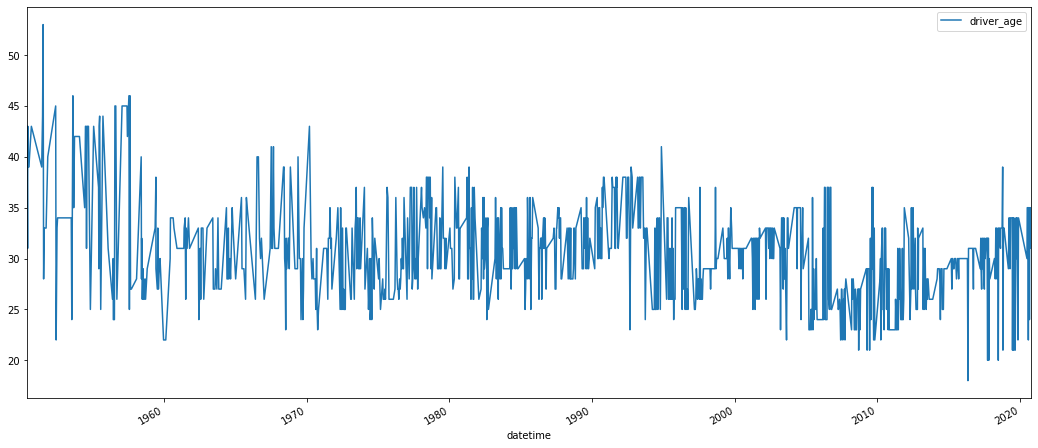

In [22]:
winner_result_df = (
    result_df[
        (result_df['position'] == 1)
    ]
        .groupby(['raceId'])
        .first()
        .reset_index()
)
winner_result_df['datetime'] = winner_result_df['raceId'].map(race_id_to_datetime_mapper)
winner_result_df['dob_dt'] = winner_result_df['driverId'].map(driver_id_to_dob_mapper)
winner_result_df['driver_age'] = ((winner_result_df['datetime'] - winner_result_df['dob_dt']).dt.days // 365).astype(int)

datetime_driver_age_df = (
    winner_result_df[['datetime', 'driver_age']]
        .sort_values(['datetime'])
        .set_index('datetime')
)

datetime_driver_age_df.plot(figsize=(18, 8))

## Which driver has consistence laptime?

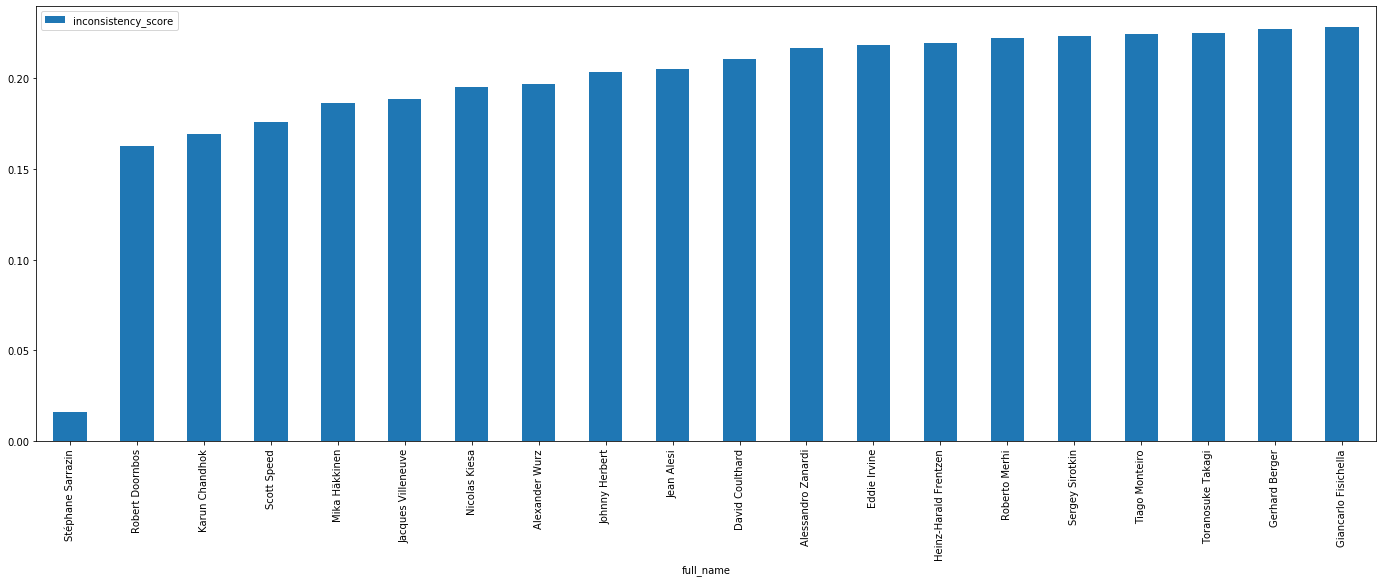

In [23]:
driver_std_lap_time_df = lap_time_df.copy(deep=True)
driver_std_lap_time_df['full_name'] = driver_std_lap_time_df['driverId'].map(driver_id_to_full_name_mapper)
driver_std_lap_time_df = (
    driver_std_lap_time_df
        .groupby(['raceId', 'full_name'])['milliseconds']
        .std()
        .reset_index()
        .rename(columns={'milliseconds': 'std_ms'})
)
driver_std_lap_time_df['scaled_std_ms'] = (
    driver_std_lap_time_df
        .groupby(['raceId'])[['std_ms']]
        .apply(lambda x: scale_min_max(x.values))
        .reset_index(drop=True)
)[0]
driver_std_lap_time_df = (
    driver_std_lap_time_df
        .groupby(['full_name'])['scaled_std_ms']
        .mean()
        .reset_index()
        .rename(columns={'scaled_std_ms': 'inconsistency_score'})
        .set_index('full_name')
        .sort_values(['inconsistency_score'])
)

driver_std_lap_time_df.sort_values('inconsistency_score', ascending = True).head(20).plot.bar(figsize=(24, 8))

## Which driver is more prove to crashed?

In [24]:
crash_status_ids = status_df[
    (status_df['status'].isin(['Collision']))
]['statusId'].to_list()

crash_status_ids

[4]

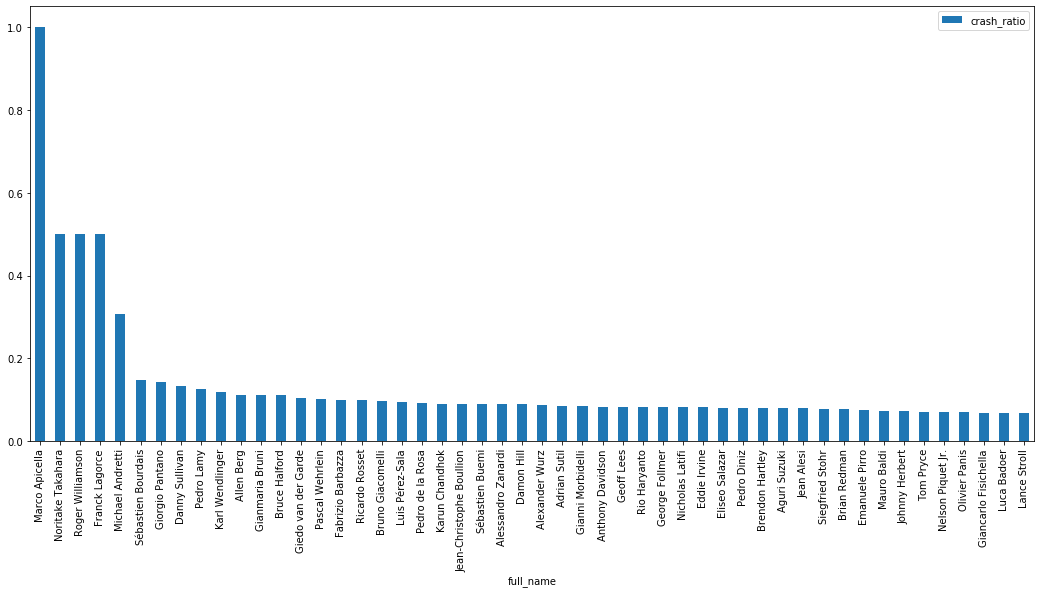

In [25]:
driver_id_crashed_race_count_series = (
    result_df[
        (result_df['statusId'].isin(crash_status_ids))
    ]
        .groupby(['driverId'])
        .size()
)

driver_id_total_race_count_series = (
    result_df
        .groupby(['driverId'])
        .size()
)

driver_id_crash_ratio_df = (
    (driver_id_crashed_race_count_series / driver_id_total_race_count_series)
        .reset_index()
        .rename(columns={0: 'crash_ratio'})
        .fillna({'crash_ratio': 0})
)
driver_id_crash_ratio_df['full_name'] = driver_id_crash_ratio_df['driverId'].map(driver_id_to_full_name_mapper)
driver_id_crash_ratio_df = (
    driver_id_crash_ratio_df
        .sort_values(['crash_ratio'], ascending=False)
        .set_index('full_name')
        .iloc[:50]
)[['crash_ratio']]

driver_id_crash_ratio_df.plot.bar(figsize=(18, 8))

# Grid Position Analysis

## Is there a correlation between grid and winning the race?

From the graph below, you can see that car in grid position =1 (pole position) is likely to win

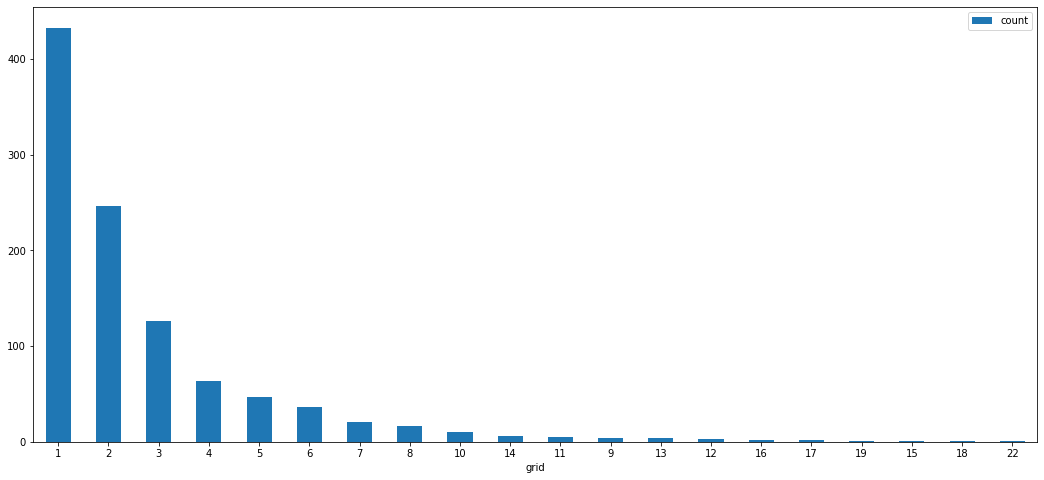

In [26]:
grid_winning_count_df = (
    result_df[
        (result_df['position'] == 1)
    ]
        .groupby(['raceId'])
        .first()
        .reset_index()
        .groupby(['grid'])
        .size()
        .sort_values(ascending=False)
        .to_frame()
        .rename(columns={0: 'count'})
)

grid_winning_count_df.plot.bar(rot=0, figsize=(18, 8))

# Constructor Analysis

## Top-10 Winner constructor

In [27]:
constructor_id_to_name_mapper = constructor_df.set_index('constructorId')['name']
constructor_id_to_name_mapper

constructorId
1                   McLaren
2                BMW Sauber
3                  Williams
4                   Renault
5                Toro Rosso
               ...         
209          Manor Marussia
210            Haas F1 Team
211            Racing Point
212    Scuderia Alpha Tauri
213              AlphaTauri
Name: name, Length: 211, dtype: object

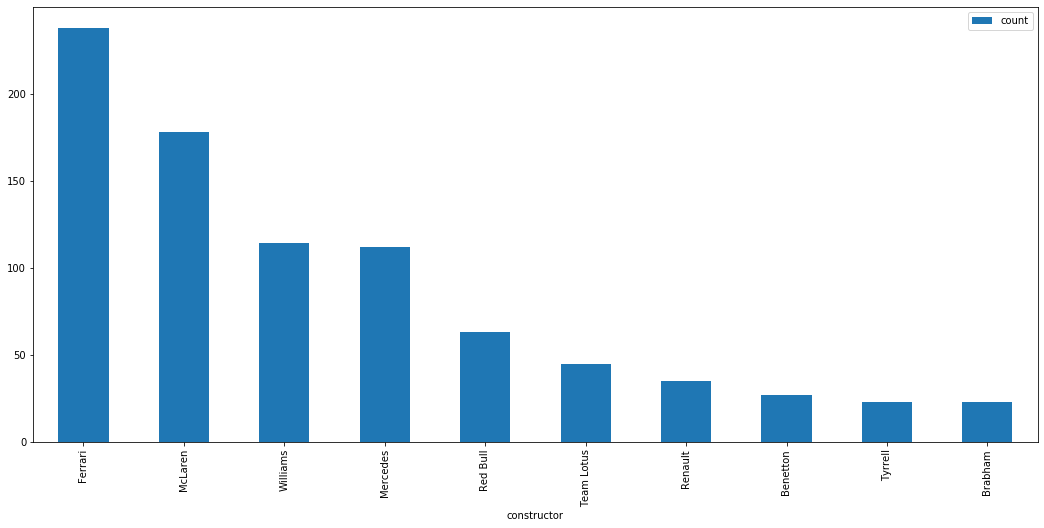

In [28]:
constructor_count_df = result_df.copy(deep=True)
constructor_count_df['constructor'] = constructor_count_df['constructorId'].map(constructor_id_to_name_mapper)
constructor_count_df = (
    constructor_count_df[
        (constructor_count_df['position'] == 1)
    ]
        .groupby(['raceId'])
        .first()
        .reset_index()
        .groupby(['constructor'])
        .size()
        .sort_values(ascending=False)
        .to_frame()
        .rename(columns={0: 'count'})
        .iloc[:10]
)

constructor_count_df.plot.bar(rot=90, figsize=(18, 8))

## Which constructor have more car failure?

In [29]:
constructor_id_to_name_mapper = constructor_df.set_index('constructorId')['name']
constructor_id_to_name_mapper

constructorId
1                   McLaren
2                BMW Sauber
3                  Williams
4                   Renault
5                Toro Rosso
               ...         
209          Manor Marussia
210            Haas F1 Team
211            Racing Point
212    Scuderia Alpha Tauri
213              AlphaTauri
Name: name, Length: 211, dtype: object

In [30]:
car_failure_status_ids = status_df[
    (status_df['status'].isin(['Collision']))
]['statusId'].to_list()

car_failure_status_ids

[4]

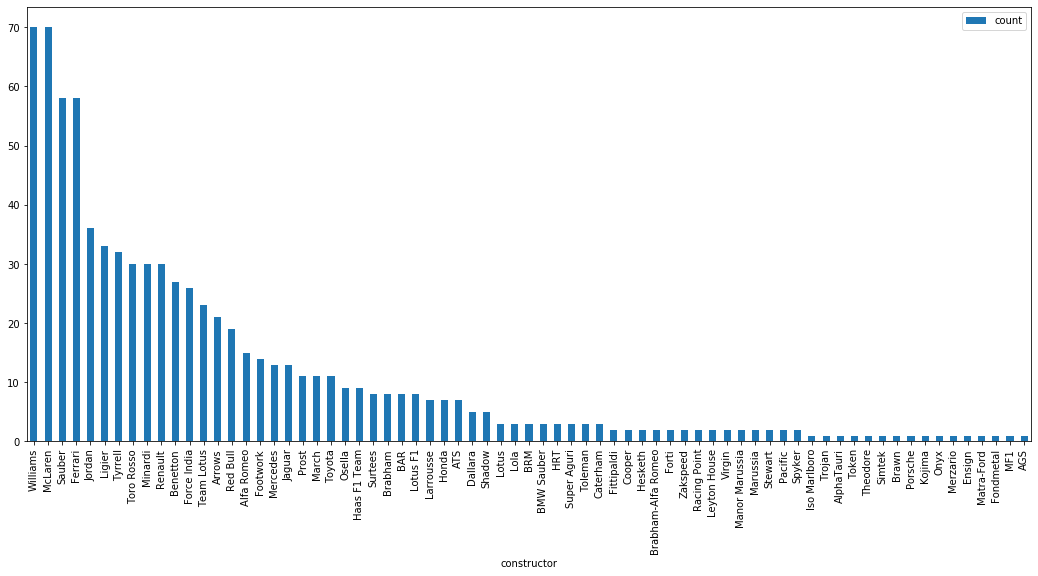

In [31]:
constructor_car_failure_count_df = result_df.copy(deep=True)
constructor_car_failure_count_df['constructor'] = constructor_car_failure_count_df['constructorId'].map(constructor_id_to_name_mapper)
constructor_car_failure_count_df = (
    constructor_car_failure_count_df[
        (constructor_car_failure_count_df['statusId'].isin(car_failure_status_ids))
    ]
        .groupby(['constructor'])
        .size()
        .sort_values(ascending=False)
        .to_frame()
        .rename(columns={0: 'count'})
)

constructor_car_failure_count_df.plot.bar(rot=90, figsize=(18, 8))

# Machine Learning Model

In this session, I use machines learning model (Randomforest classifier) to predict the winner of the race. Then i use feature importance score to find out what feature(factors) contribute the most in predicting the winner.

### prepare data for the model

In [32]:
df1 = pd.merge(left = race_df, right = circuit_df , on ='circuitId', how='left').drop(['url_x','url_y','time','datetime','name_y','name_x','alt'], axis=1)

In [33]:
df2 = pd.merge(df1, weather_df, how ='inner', on=['year','round','circuitRef']).drop(['lat','lng','weather'],axis=1) 
# lost some data because weather_df only have data up to year 2019

In [34]:
df3 = pd.merge(result_df[['raceId','driverId','constructorId','grid','positionOrder','milliseconds','statusId']],
 driver_df[['driverId','driverRef','dob_dt','nationality']], on='driverId',how='inner')

In [35]:
df3_5 = pd.merge(df3, driver_standing_df, how ='inner', on=['raceId','driverId']).drop(
    ['milliseconds','driverStandingsId','positionText'],axis=1).rename(
        columns={'points':'driver_points','wins':'driver_wins','position':'driver_standings_position'}
    )

In [36]:
df4 = pd.merge(df2, df3_5, how ='inner', on='raceId')

In [37]:
#joining constructor_df to get constructorRef using constructorId
df5 = pd.merge(df4, constructor_df[['constructorId','constructorRef']], how ='inner', on='constructorId')

In [38]:
#prepare constructor_standing_df for joining
df6 = constructor_standing_df.drop(['constructorStandingsId','positionText'],axis=1).rename(
    columns = {'points':'constructor_points','position':'constructor_standings_position','wins':'constructor_wins'}
)

In [39]:
#joining constructor_standing_df to get constructor infomation
df7 = pd.merge(df5, df6, how ='inner', on=['raceId','constructorId'])

In [40]:
# getting driver age
result_df['datetime'] = result_df['raceId'].map(race_id_to_datetime_mapper)
result_df['dob_dt'] = result_df['driverId'].map(driver_id_to_dob_mapper)
result_df['driver_age'] = ((result_df['datetime'] - result_df['dob_dt']).dt.days // 365).astype(int)

In [41]:
df8 = pd.merge(df7, result_df[['raceId','driverId','driver_age']], how ='left', on=['raceId','driverId'])

In [42]:
df8 = df8.drop(['raceId','circuitId','date','location','country','driverId','constructorId','statusId','dob_dt','driver_wins','driver_standings_position'],axis=1).rename(
    columns={'circuitRef':'circuit','constructorRef':'constructor'}
)

In [43]:
df_dummy = pd.get_dummies(df8, columns=['circuit','nationality','constructor'])
df_dummy

,year,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,grid,positionOrder,driverRef,...,constructor_tomaso,constructor_toro_rosso,constructor_toyota,constructor_trojan,constructor_tyrrell,constructor_vanwall,constructor_virgin,constructor_williams,constructor_wolf,constructor_zakspeed
0,2009,1,1,0,0,0,0,9,10,heidfeld,...,0,0,0,0,0,0,0,0,0,0
1,2009,1,1,0,0,0,0,4,14,kubica,...,0,0,0,0,0,0,0,0,0,0
2,2009,2,0,0,1,1,0,10,2,heidfeld,...,0,0,0,0,0,0,0,0,0,0
3,2009,2,0,0,1,1,0,6,19,kubica,...,0,0,0,0,0,0,0,0,0,0
4,2009,3,0,0,0,1,0,11,12,heidfeld,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22479,2019,19,1,0,0,0,0,14,13,stroll,...,0,0,0,0,0,0,0,0,0,0
22480,2019,20,1,0,0,0,0,15,9,perez,...,0,0,0,0,0,0,0,0,0,0
22481,2019,20,1,0,0,0,0,17,19,stroll,...,0,0,0,0,0,0,0,0,0,0
22482,2019,21,1,0,0,0,0,10,7,perez,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df_model = df_dummy.copy()
#we want to predict the winner so we will focus on only position ==1 
df_model.positionOrder = df_model.positionOrder.map(lambda x: 1 if x == 1 else 0)

#training data include all races took place before 2019
train = df_model[df_model.year <2019]
X_train = train.drop(['driverRef', 'positionOrder'], axis = 1)
y_train = train.positionOrder

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

In [45]:
rf = RandomForestClassifier(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

Let's look at the feature importances score.

In [46]:
score = pd.DataFrame(X_train.columns,rf.feature_importances_).reset_index().rename(columns= {'index':'importance_score',0:'feature'})

In [47]:
temp_df = score.sort_values('importance_score', ascending = False).head(10)
temp_df

,importance_score,feature
7,0.128510,grid
8,0.122656,driver_points
11,0.088970,constructor_wins
9,0.087864,constructor_points
1,0.065472,round
10,0.058329,constructor_standings_position
0,0.057966,year
12,0.055461,driver_age
2,0.015827,weather_warm
4,0.014005,weather_dry


Text(0.5, 0, 'Random Forest Feature Importance')

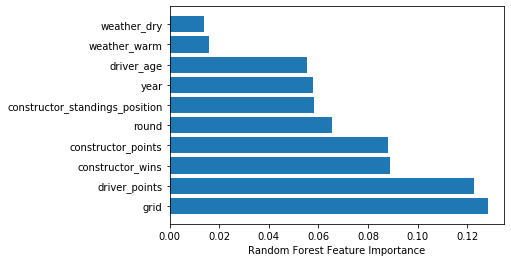

In [48]:
plt.barh(temp_df.feature, temp_df.importance_score)
plt.xlabel("Random Forest Feature Importance")

Considering feature importance according to randomforestclassfier, the grid position seem to play the most important role in predicting the winner, along with other features such as points prior to the race.